<br><font color='darkviolet' size=8><u>Understanding Cluster Formation in KMeans</u></font>

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

<b>The below <font color='darkviolet'>function</font> produces <font color='darkviolet'>data points</font> in the shape of a <font color='darkviolet'>circle</font> of specified <font color='darkviolet'>centre</font>, <font color='darkviolet'>radius</font> and <font color='darkviolet'>number of samples</font>.</b>

In [2]:
def circles(centre=[0,0],radius=1,samples=1000):
    square_box=np.random.uniform(-radius,radius,[4*samples,2])
    count=0
    data=[]
    for point in square_box:
        if (point**2).sum()<=radius**2:
            data.append(list(point+np.array(centre)))
            count+=1
            if count==samples:
                return np.array(data)

<b>Like any other ML algorithm, KMeans clustering also has its own set of pros and cons. Here we're going to discuss a specific kind of disadvantage of this algorithm which is the fact that what appears to be a 'natural cluster' for a human eye is not necessarily what appears to be a cluster from machine's perspective. Kindly note that I'm NOT using the word 'disadvantage' in a strict sense. There's nothing inherently wrong with the clusters formed by KMeans clustering algorithm, it meets its objective of reducing the sum of squared distance from its respective cluster centres, pretty well (except for the annoying fact that it may converge at a local optima). <br>

# Intuition meets algorithm!<br>
KMeans clustering matches with our intuition well only in the case of presence of clusters which are <font color='darkgreen'>well-separated</font>, atleast <font color='darkgreen'>roughly spherical</font> of <font color='darkgreen'>same size</font> and with more or less <font color='darkgreen'>same number of data points</font>. In all the following scenarios we're going to deal with only two clusters to keep the discussion & visualization simple.

In [3]:
cir1=circles()
cir2=circles(centre=[2.5,0])
cir=np.vstack([cir1,cir2])

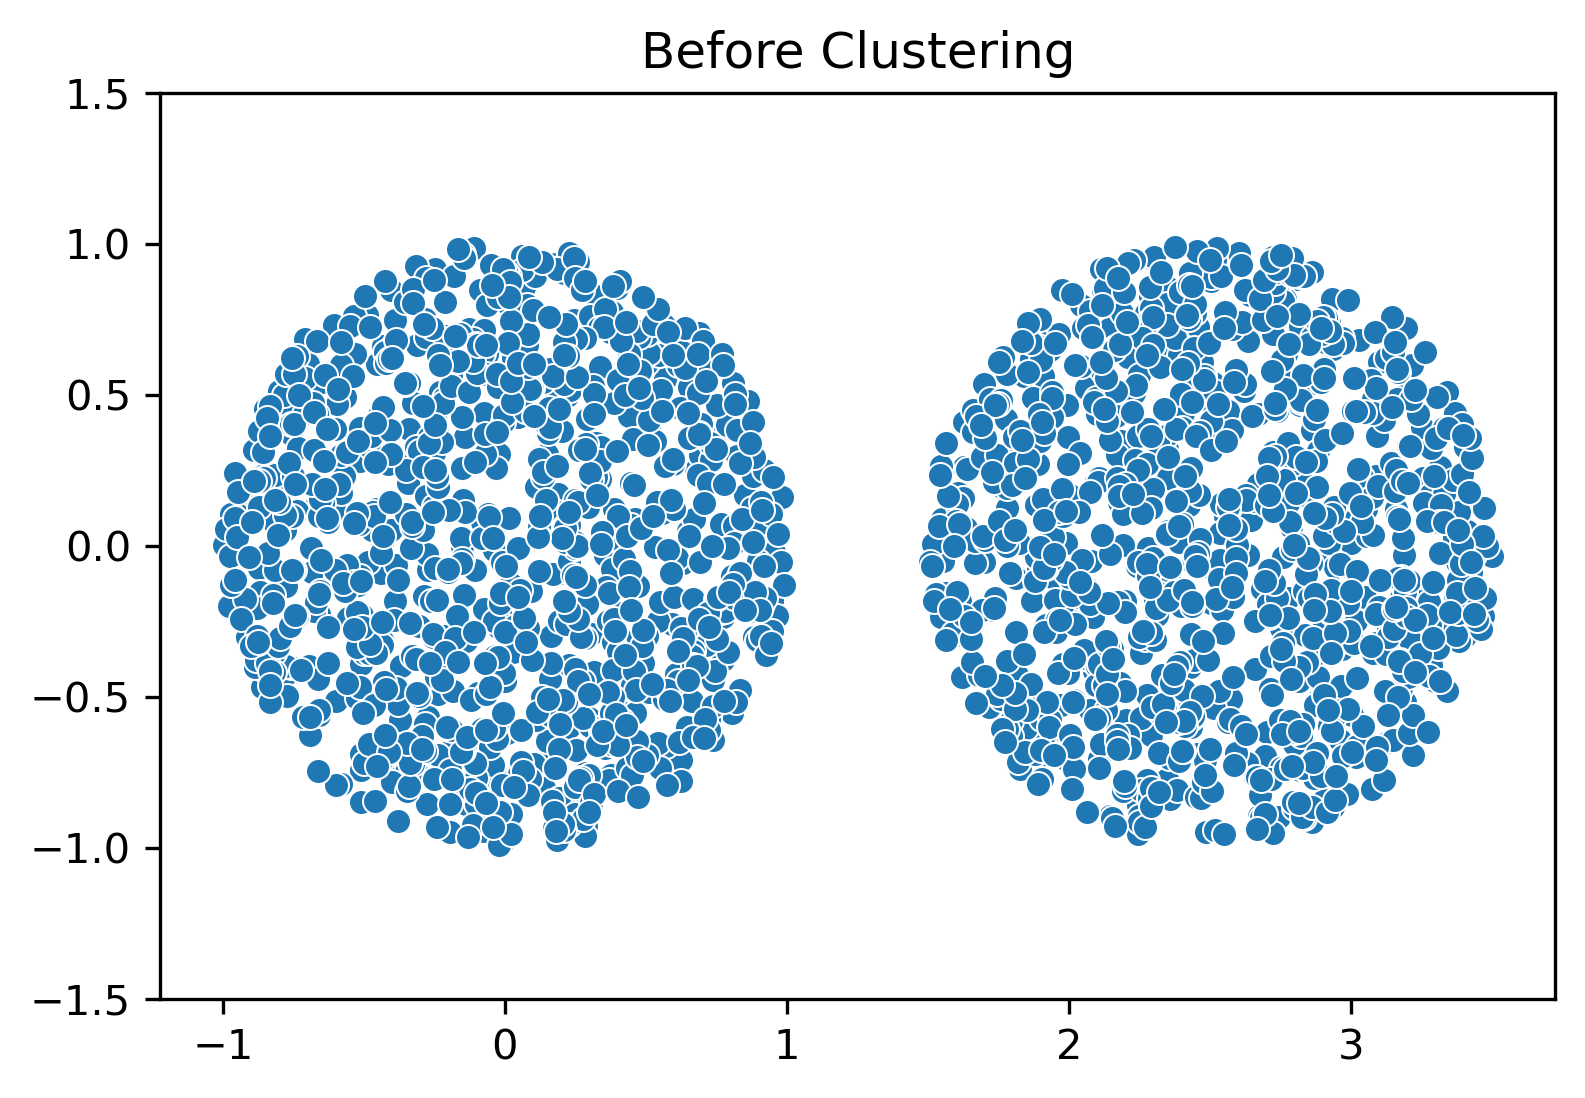

In [4]:
plt.figure(dpi=300)
plt.title('Before Clustering')
plt.ylim(-1.5,1.5)
sns.scatterplot(x=cir[:,0],y=cir[:,1]);

In [5]:
km1=KMeans(n_clusters=2, random_state=101)

In [6]:
label1=km1.fit_predict(cir)
label1

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
centroid1=km1.cluster_centers_
centroid1

array([[6.21226832e-03, 2.23658475e-03],
       [2.50115252e+00, 4.66225266e-03]])

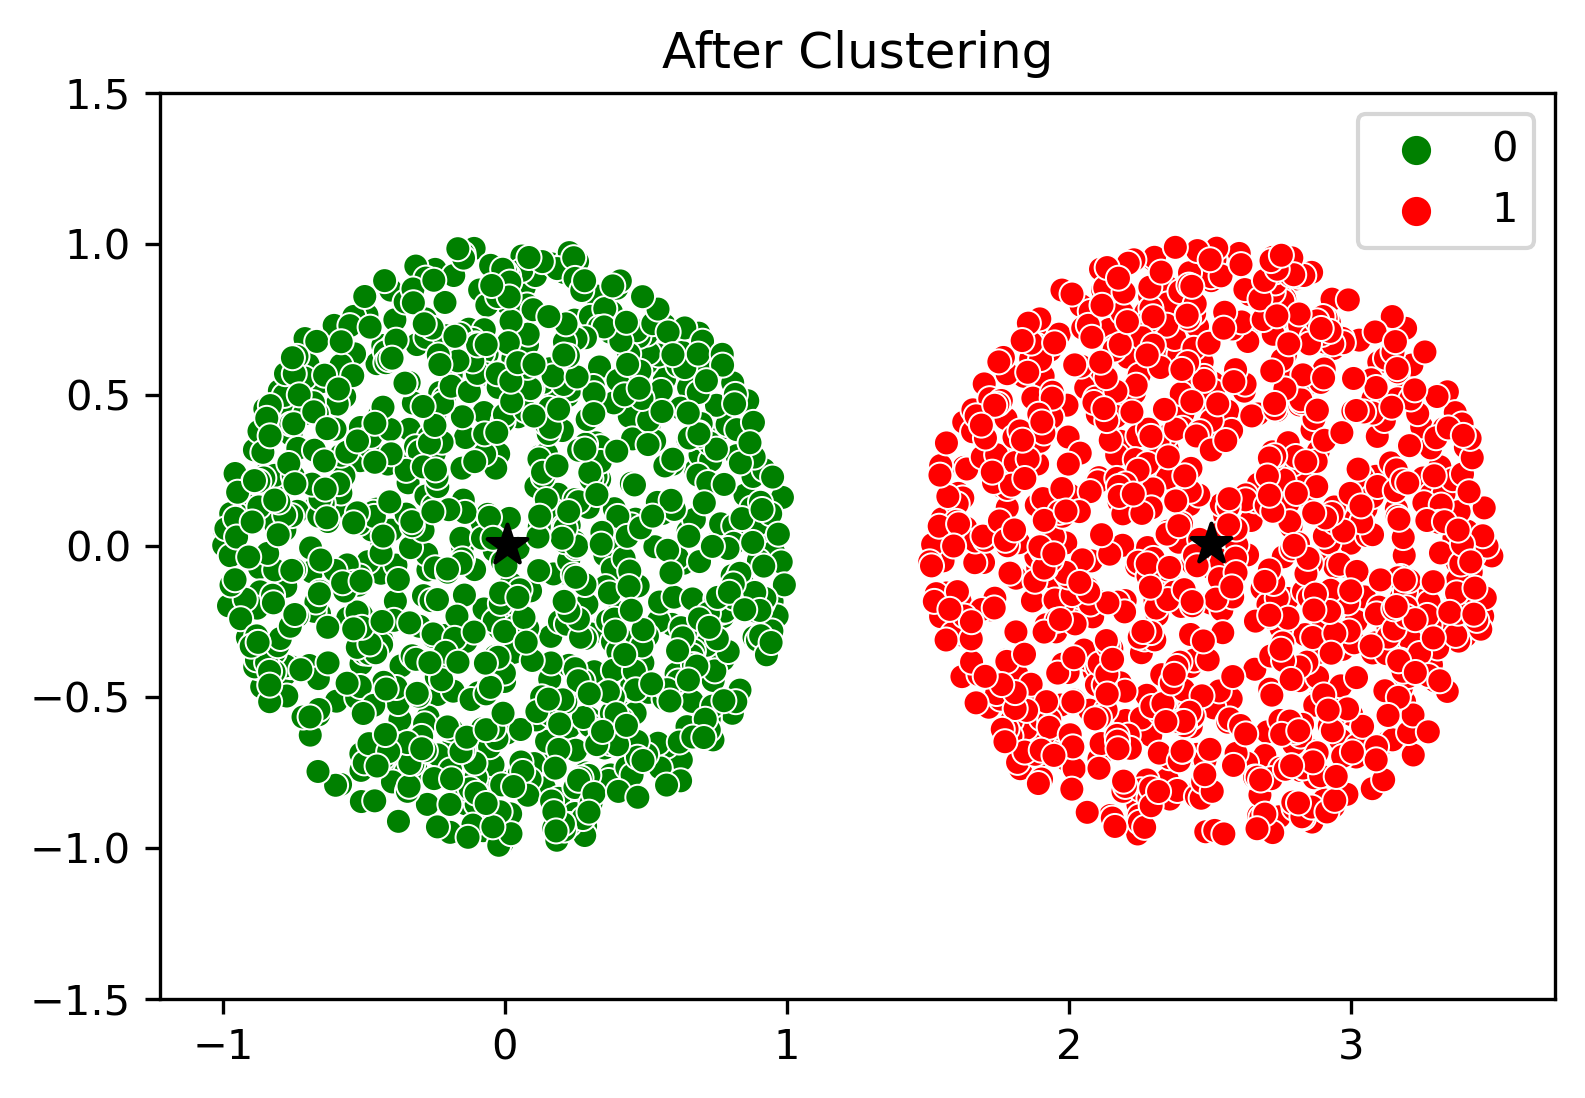

In [8]:
plt.figure(dpi=300)
plt.title('After Clustering')
plt.ylim(-1.5,1.5)
sns.scatterplot(x=cir[:,0],y=cir[:,1],hue=label1,palette=['Green','Red'])
plt.scatter(x=centroid1[:,0],y=centroid1[:,1],marker='*', color='Black', s=100);

<b>Those <font color='blue'>two stars</font> are the <font color='blue'>centroids</font> of their respective <font color='blue'>clusters</font>. In the above case, the clusters formed by the algorithm is in line with how we would form the clusters ourselves.</b>

<hr>

# What if the clusters are NOT of same size?
<b>Here we are going to use two well separated circular clusters with same number of samples in each but <font color='darkviolet'>different radii</font>. Lets see how <font color='darkviolet'>KMeans clustering algorithm</font> clusters it.</b> 

In [9]:
cir1=circles(radius=0.5)
cir2=circles(centre=[2.7,0],radius=2)
cir=np.vstack([cir1,cir2])

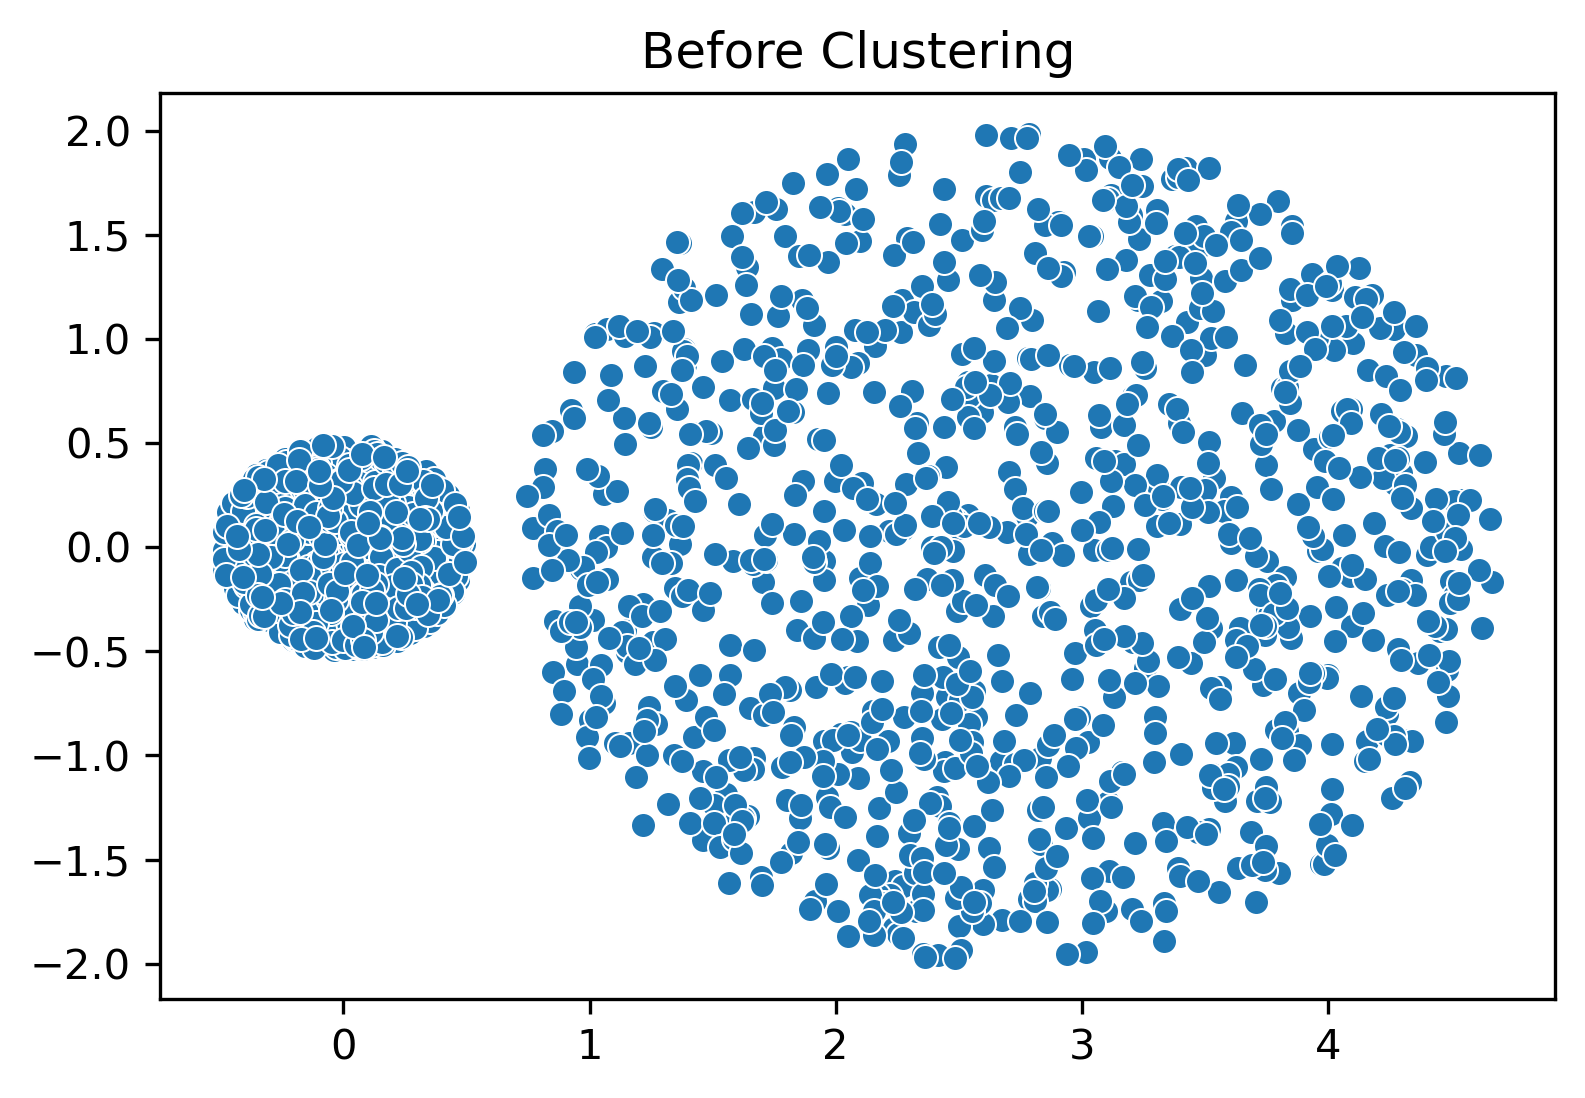

In [10]:
plt.figure(dpi=300)
plt.title('Before Clustering')
sns.scatterplot(x=cir[:,0],y=cir[:,1]);

In [11]:
km2=KMeans(n_clusters=2, random_state=101)

In [12]:
label2=km2.fit_predict(cir)
label2

array([0, 0, 0, ..., 0, 1, 0])

In [13]:
centroid2=km2.cluster_centers_
centroid2

array([[ 0.17432631,  0.00620689],
       [ 3.01146793, -0.06010686]])

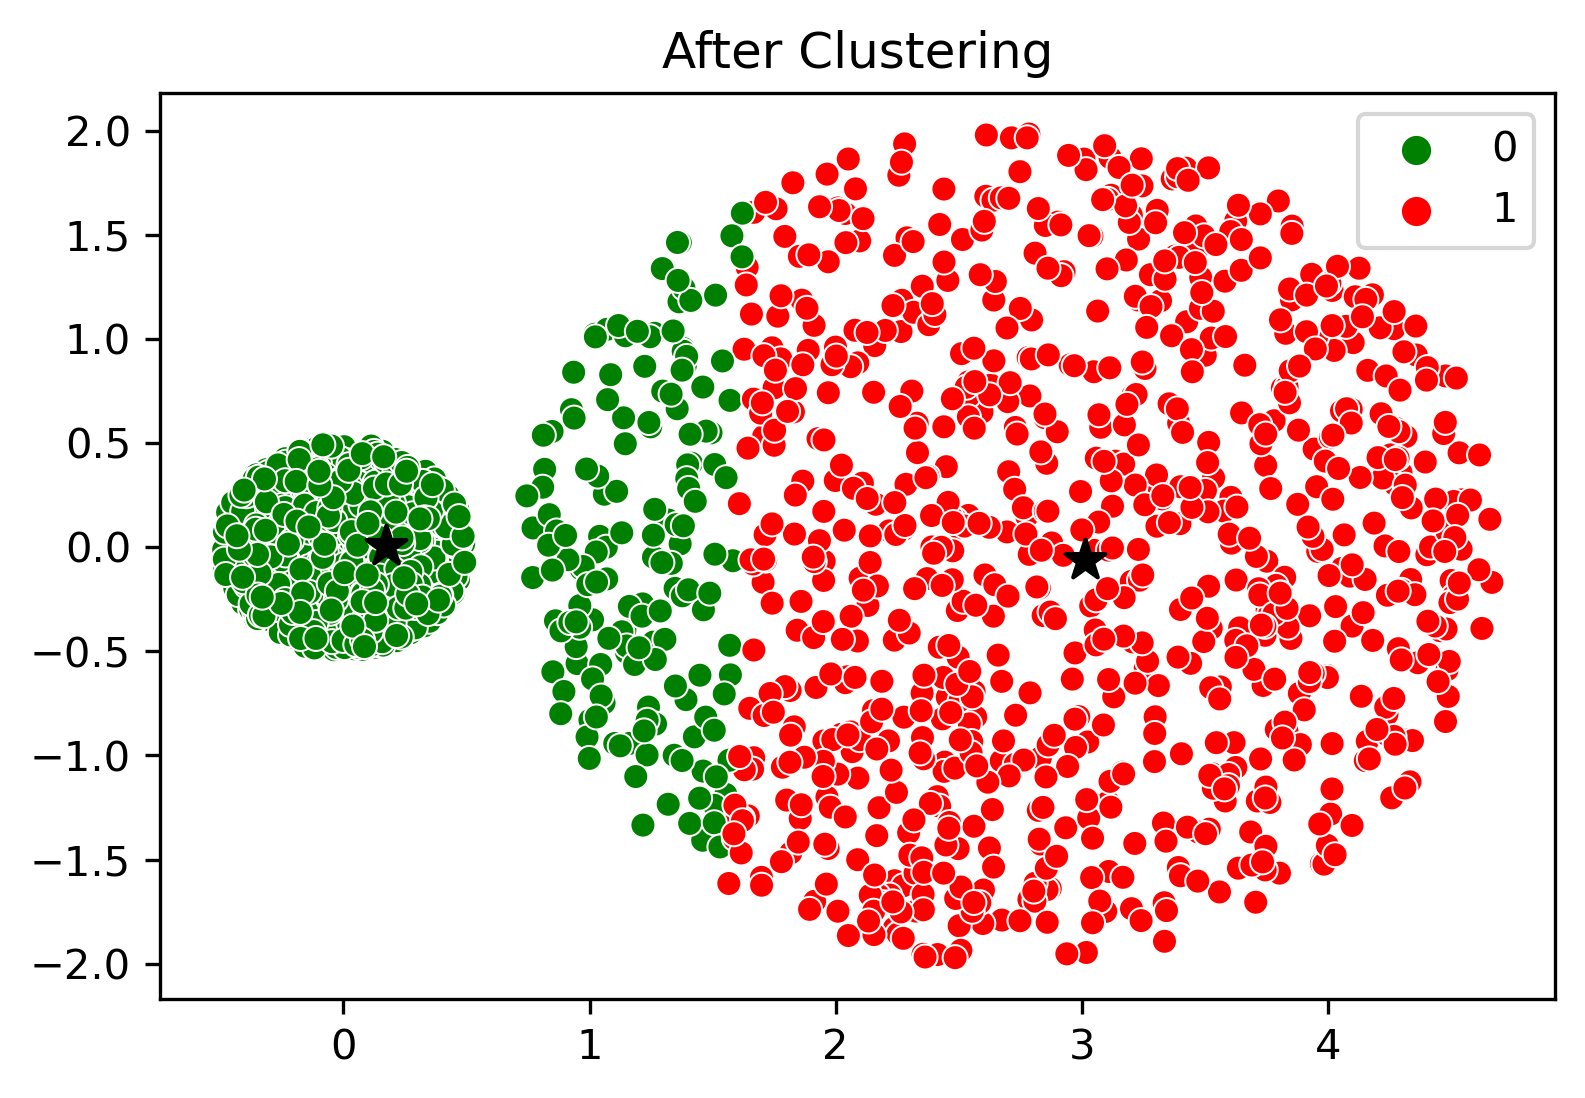

In [14]:
plt.figure(dpi=300)
plt.title('After Clustering')
sns.scatterplot(x=cir[:,0],y=cir[:,1],hue=label2,palette=['Green','Red'])
plt.scatter(x=centroid2[:,0],y=centroid2[:,1],marker='*', color='Black', s=100);

<b>Those <font color='blue'>two stars</font> are the <font color='blue'>centroids</font> of their respective <font color='blue'>clusters</font>. In the above case, what would have been otherwise interpreted as one small cluster and one big cluster by a human, is now clustered in the above manner by the algorithm. The smaller circle is gobbling up a portion of the bigger circle.

<hr>
    
# What if the clusters do NOT have same number of samples?<br>
<b>Here we are going to use two well separared circular clusters of same radii but <font color='darkviolet'>different number of samples</font>. Lets see how <font color='darkviolet'>KMeans clustering algorithm</font> clusters it.</b> 

In [15]:
cir1=circles(samples=200)
cir2=circles(centre=[2.5,0],samples=20000)
cir=np.vstack([cir1,cir2])

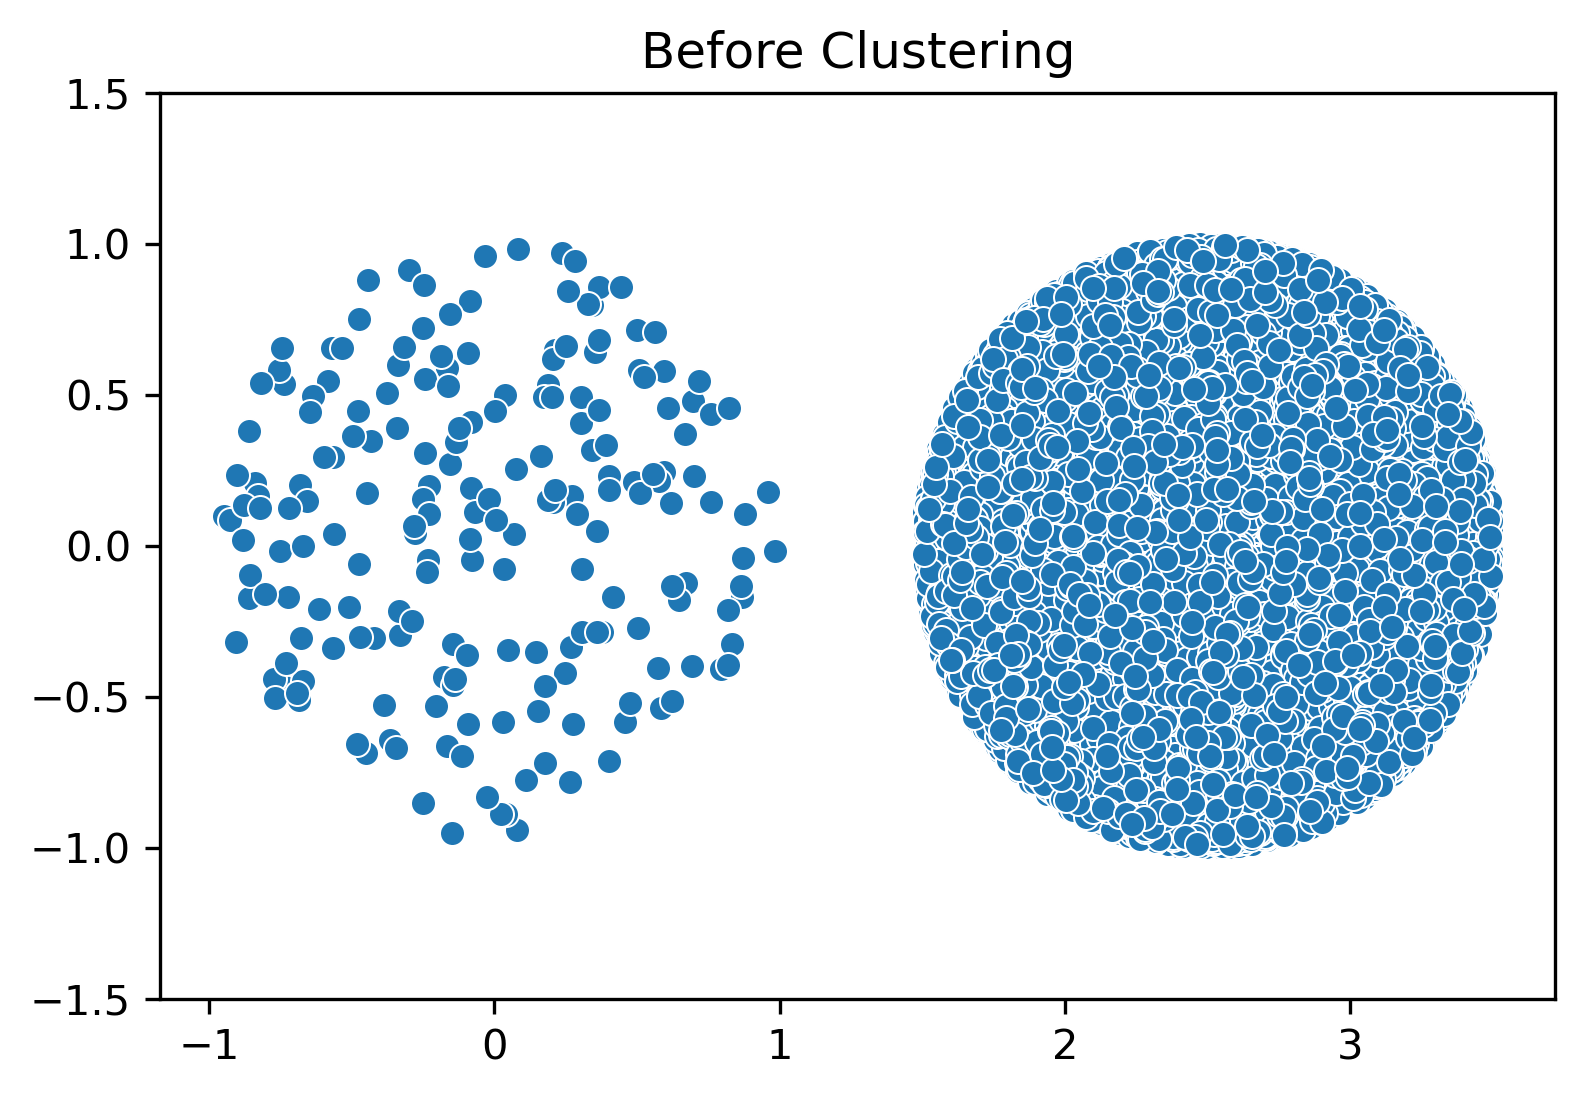

In [16]:
plt.figure(dpi=300)
plt.title('Before Clustering')
plt.ylim(-1.5,1.5)
sns.scatterplot(x=cir[:,0],y=cir[:,1]);

In [17]:
km3=KMeans(n_clusters=2, random_state=101)

In [18]:
label3=km3.fit_predict(cir)
label3

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
centroid3=km3.cluster_centers_
centroid3

array([[ 2.01173959,  0.07089802],
       [ 2.89371792, -0.06552061]])

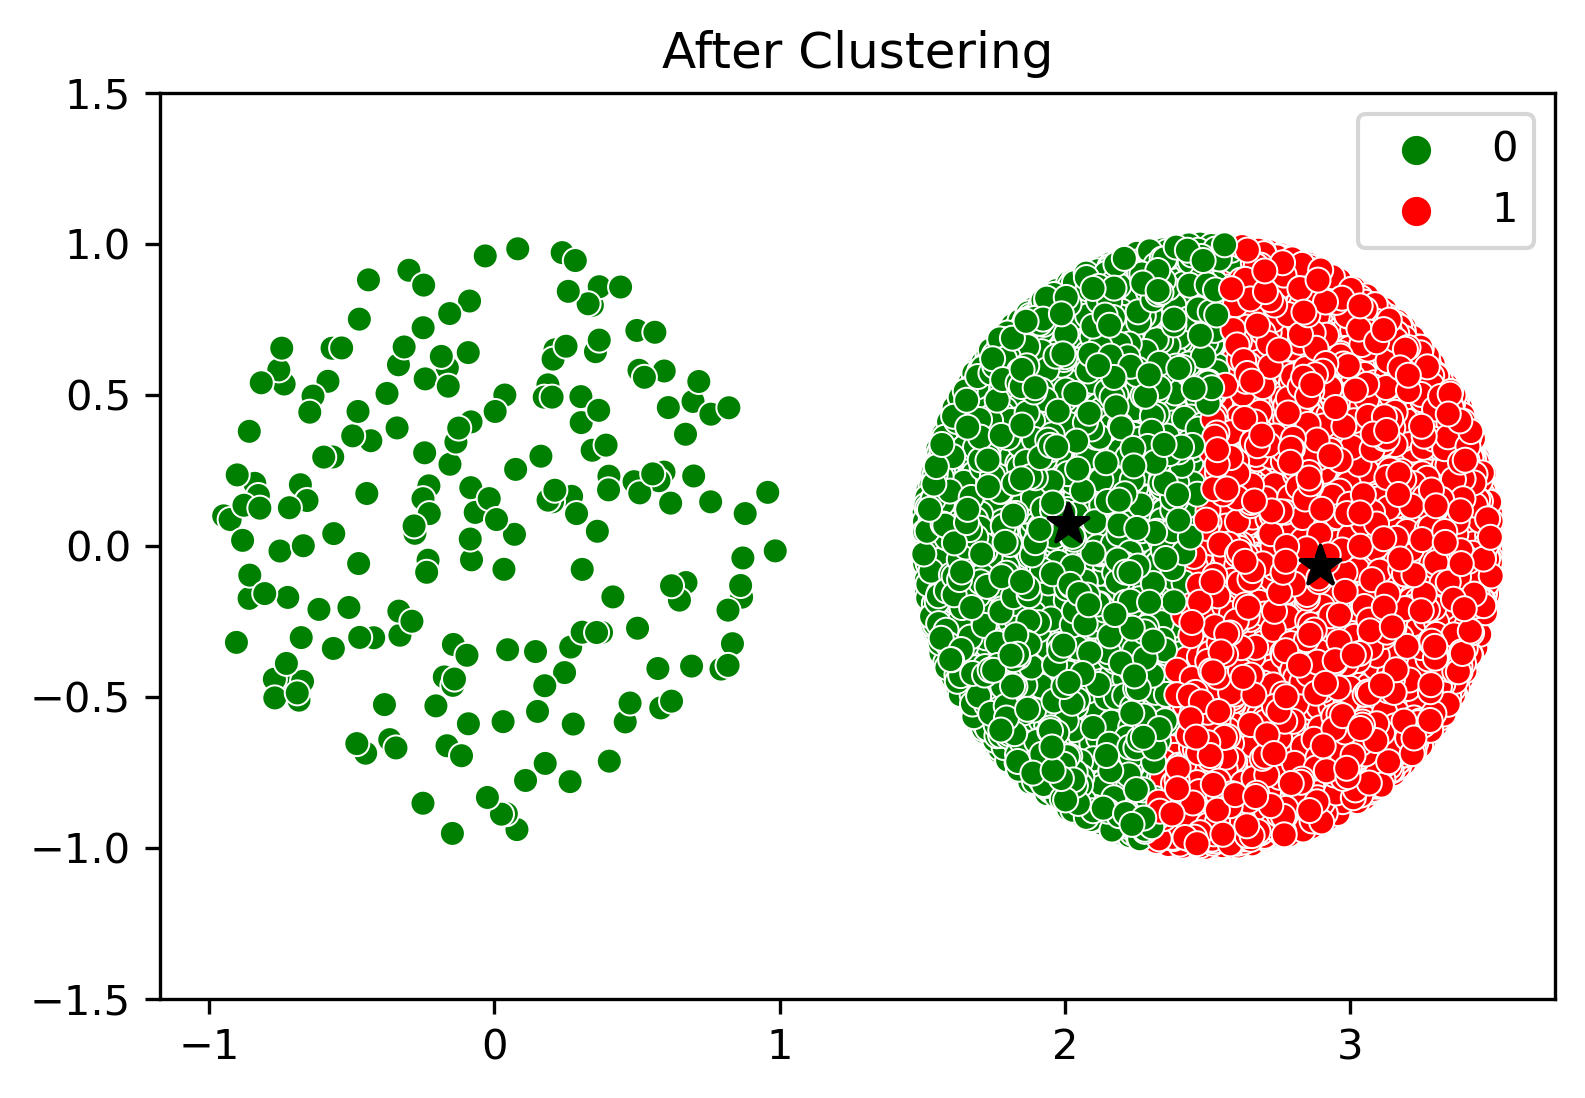

In [20]:
plt.figure(dpi=300)
plt.title('After Clustering')
plt.ylim(-1.5,1.5)
sns.scatterplot(x=cir[:,0],y=cir[:,1],hue=label3,palette=['Green','Red'])
plt.scatter(x=centroid3[:,0],y=centroid3[:,1],marker='*', color='Black', s=100);

<b>Those <font color='blue'>two stars</font> are the <font color='blue'>centroids</font> of their respective <font color='blue'>clusters</font>. In the above case, what would have been otherwise interpreted as one sparse cluster and one dense cluster by a human, is now clustered in the above manner by the algorithm. Basically we are better off having two centroids in the extremely dense circle than to have one centroid for each circle.
    
<hr>
    
# What if the clusters are of same size and same density but NOT well separated?<br>
<b>Here we are going to use two slightly overlapping circular clusters of same radii and same density. Lets see how <font color='darkviolet'>KMeans clustering algorithm</font> clusters it.</b> 

In [21]:
cir1=circles()
lab1=np.zeros(1000,)
cir2=circles(centre=[1.25,0])
lab2=np.ones(1000,)
cir=np.vstack([cir1,cir2])
lab=np.hstack([lab1,lab2])

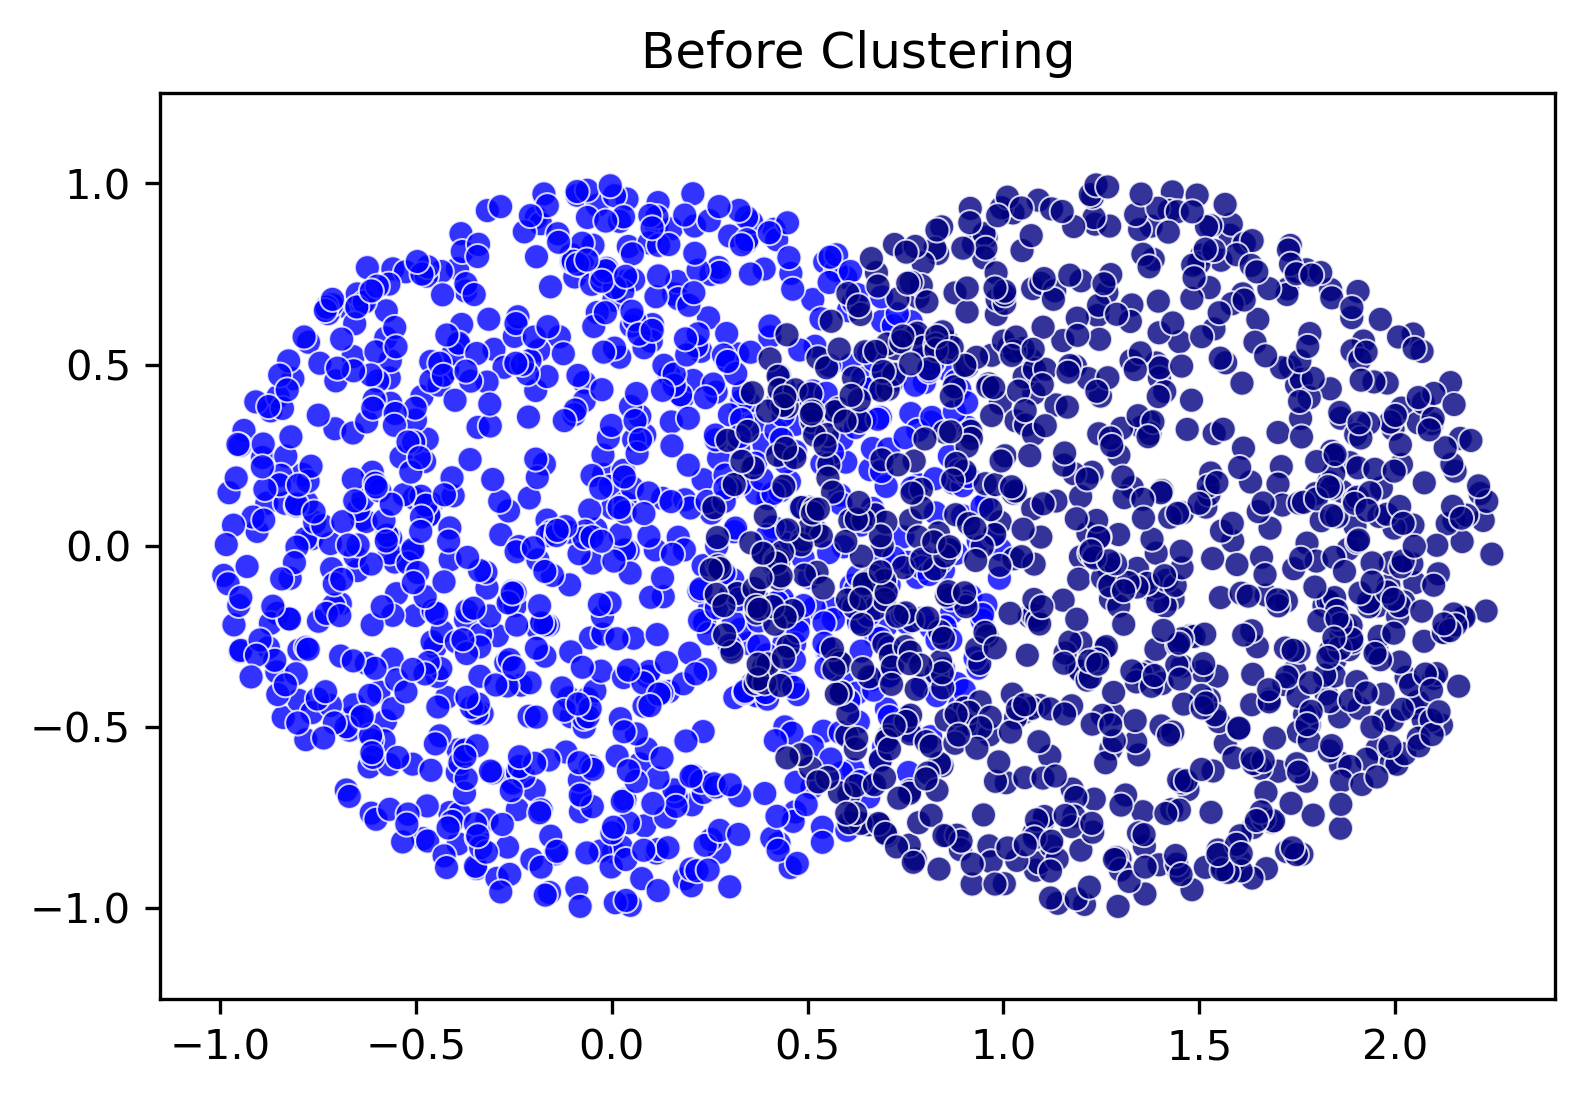

In [22]:
plt.figure(dpi=300)
plt.title('Before Clustering')
plt.ylim(-1.25,1.25)
sns.scatterplot(x=cir[:,0],y=cir[:,1],hue=lab,alpha=0.8,palette=['Blue','Navy'])
plt.legend('',frameon=False);

<b>Note that the above data is NOT clustered by the algorithm. Instead look at it this way, we somehow have a prior knowledge about the existence of these two clusters and we also knew that these two clusters are overlapping. With this prior knowledge lets see how the KMeans clustering algorithm performs on the above data</b>

In [23]:
km4=KMeans(n_clusters=2, random_state=101)

In [24]:
label4=km4.fit_predict(cir)
label4

array([1, 1, 0, ..., 0, 0, 0])

In [25]:
centroid4=km4.cluster_centers_
centroid4

array([[ 1.28931295, -0.02723751],
       [-0.07130907,  0.02140854]])

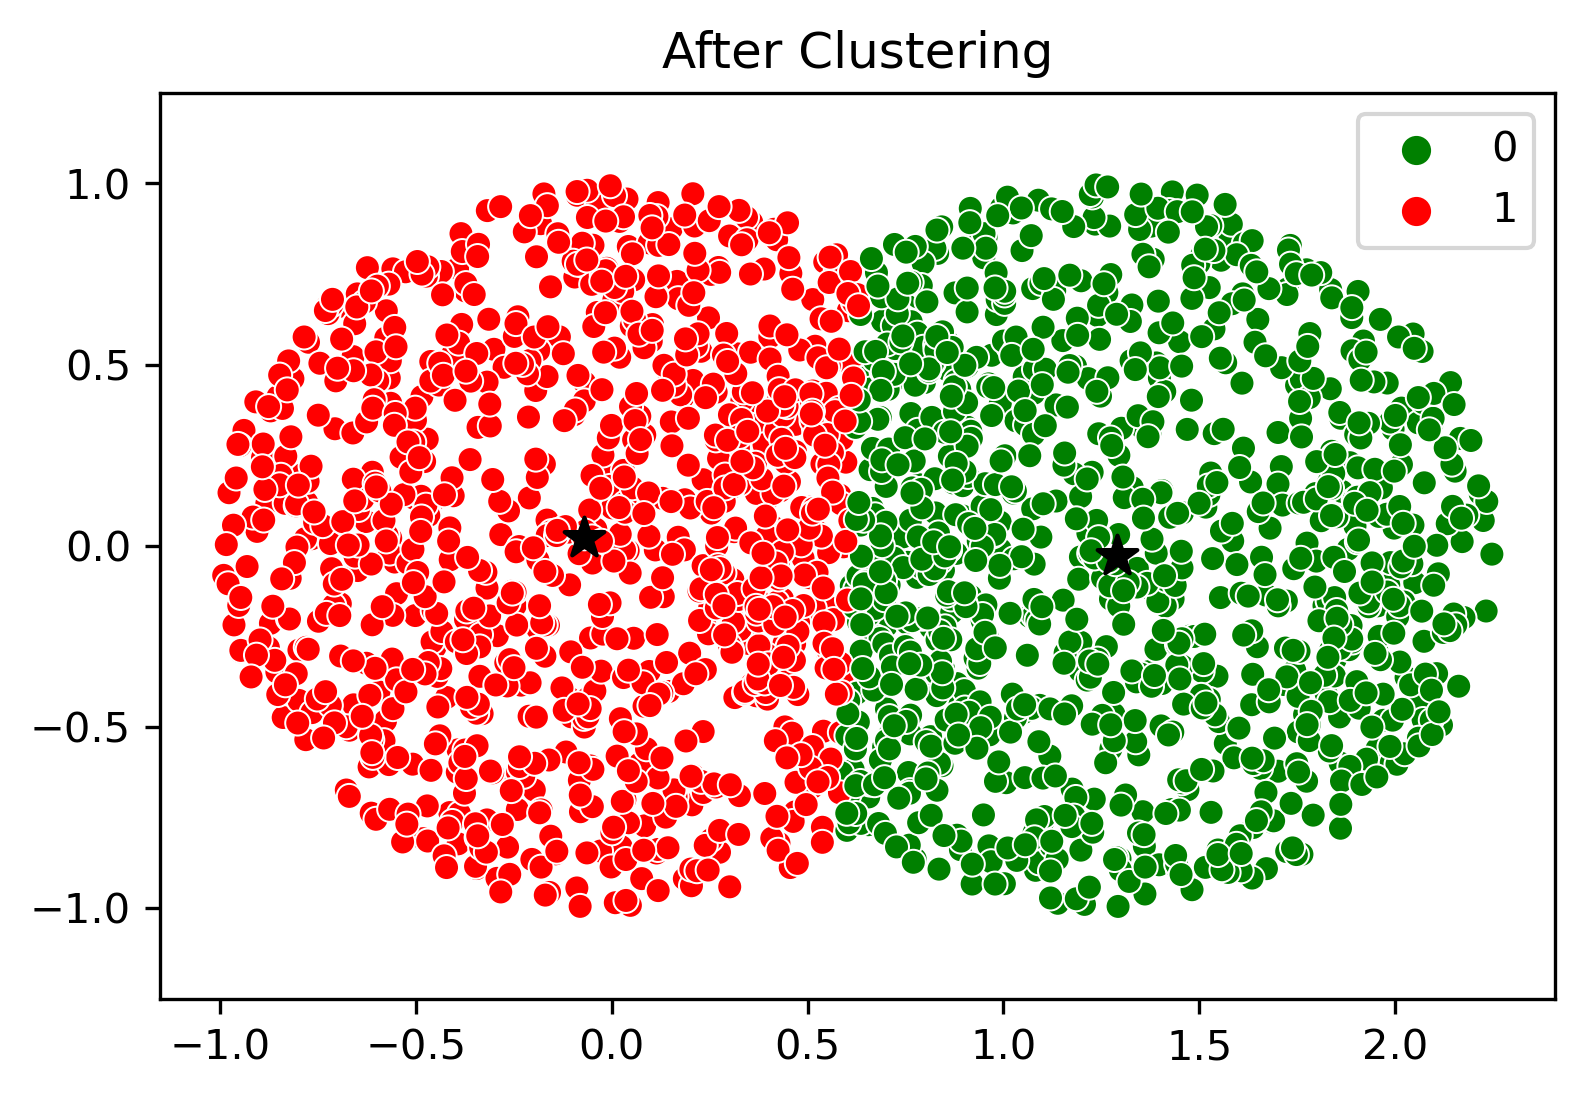

In [26]:
plt.figure(dpi=300)
plt.title('After Clustering')
plt.ylim(-1.25,1.25)
sns.scatterplot(x=cir[:,0],y=cir[:,1],hue=label4,palette=['Green','Red'])
plt.scatter(x=centroid4[:,0],y=centroid4[:,1],marker='*', color='Black', s=100);

<b>Those <font color='blue'>two stars</font> are the <font color='blue'>centroids</font> of their respective <font color='blue'>clusters</font>. In the above case, neither humans nor the algorithm can figure out the 'true' clusters. But by looking at the graph, at the very least we would easily guess that there are actually 2 circles which are overlapping, whereas KMeans clustering algorithm will cut right through the 'centre' of the overlap using the perpendicular bisector of the line segment joining the centroids.
    
<hr>
    
# What if the clusters are of same density but NOT of same shape?<br>
<b>Here we are going to use two well-separated different-shaped clusters (say 1 circular and 1 elliptical) of same density. Lets see how <font color='darkviolet'>KMeans clustering algorithm</font> clusters it.</b> 

In [27]:
cir1=circles()
ellp1=np.array([2,0])+circles()*np.array([0.2,5])
diff_shape=np.vstack([cir1,ellp1])

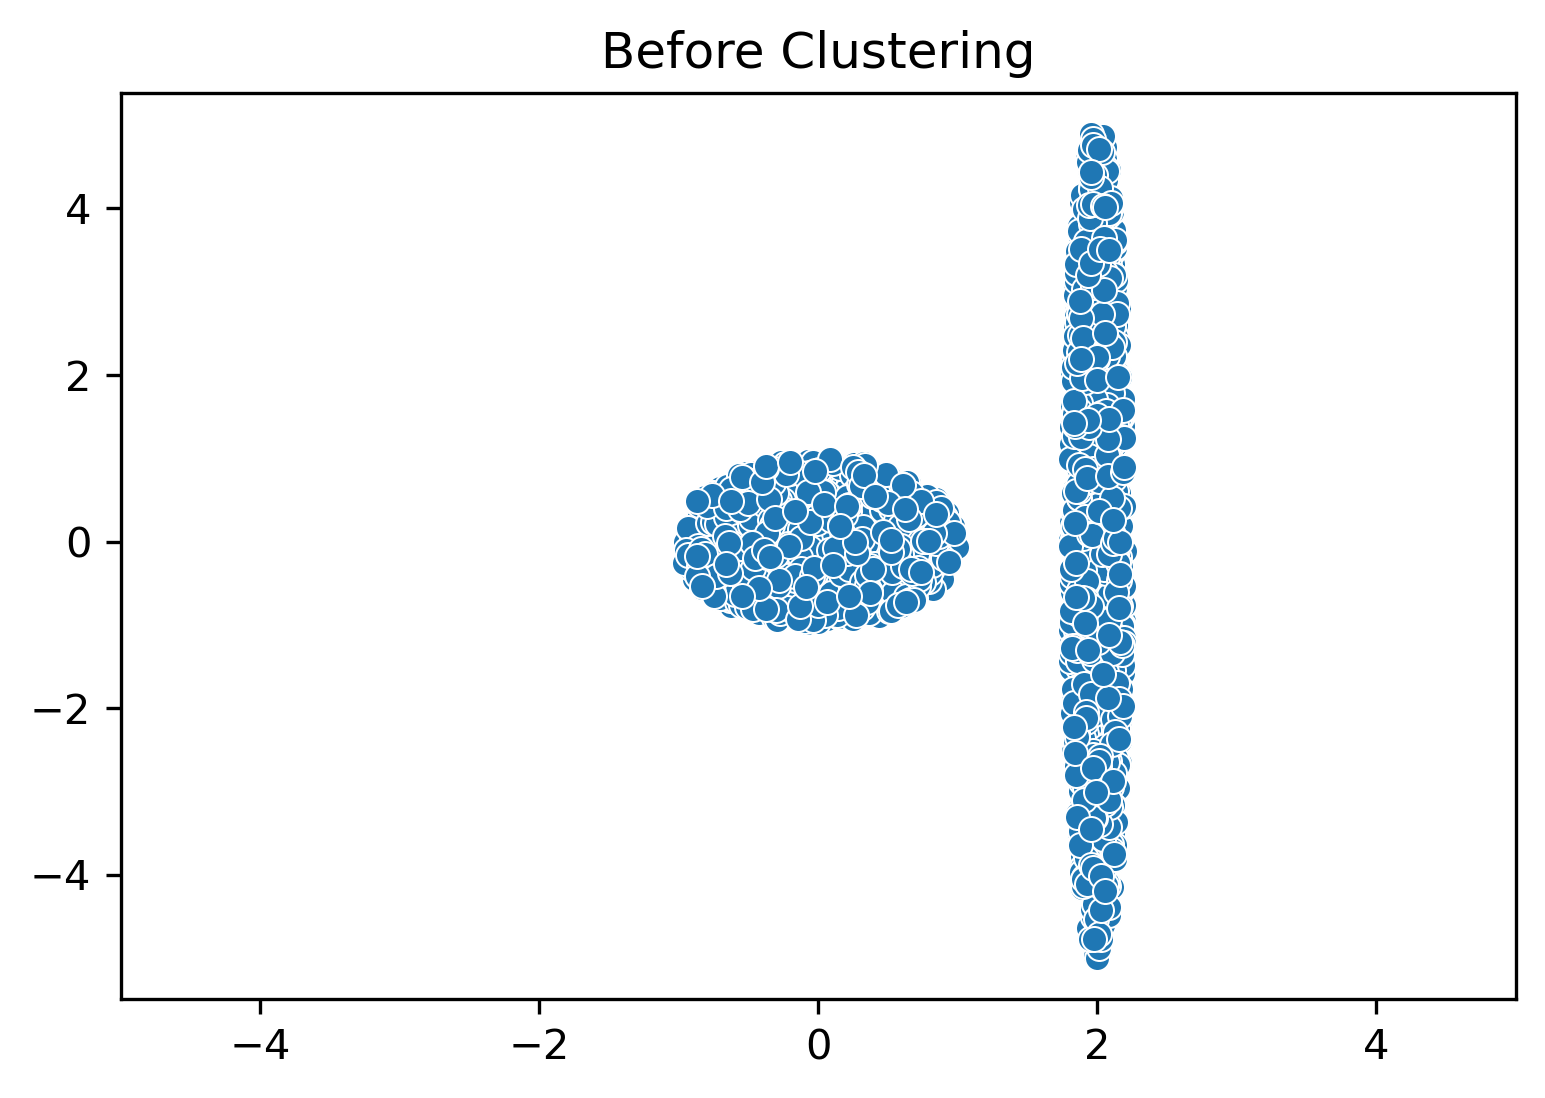

In [28]:
plt.figure(dpi=300)
plt.title('Before Clustering')
plt.xlim(-5,5)
sns.scatterplot(x=diff_shape[:,0],y=diff_shape[:,1]);

In [29]:
km5=KMeans(n_clusters=2, random_state=101)

In [30]:
label5=km5.fit_predict(diff_shape)
label5

array([0, 0, 0, ..., 1, 0, 1])

In [31]:
centroid5=km5.cluster_centers_
centroid5

array([[ 0.72559183, -0.65563605],
       [ 1.99082593,  2.51389583]])

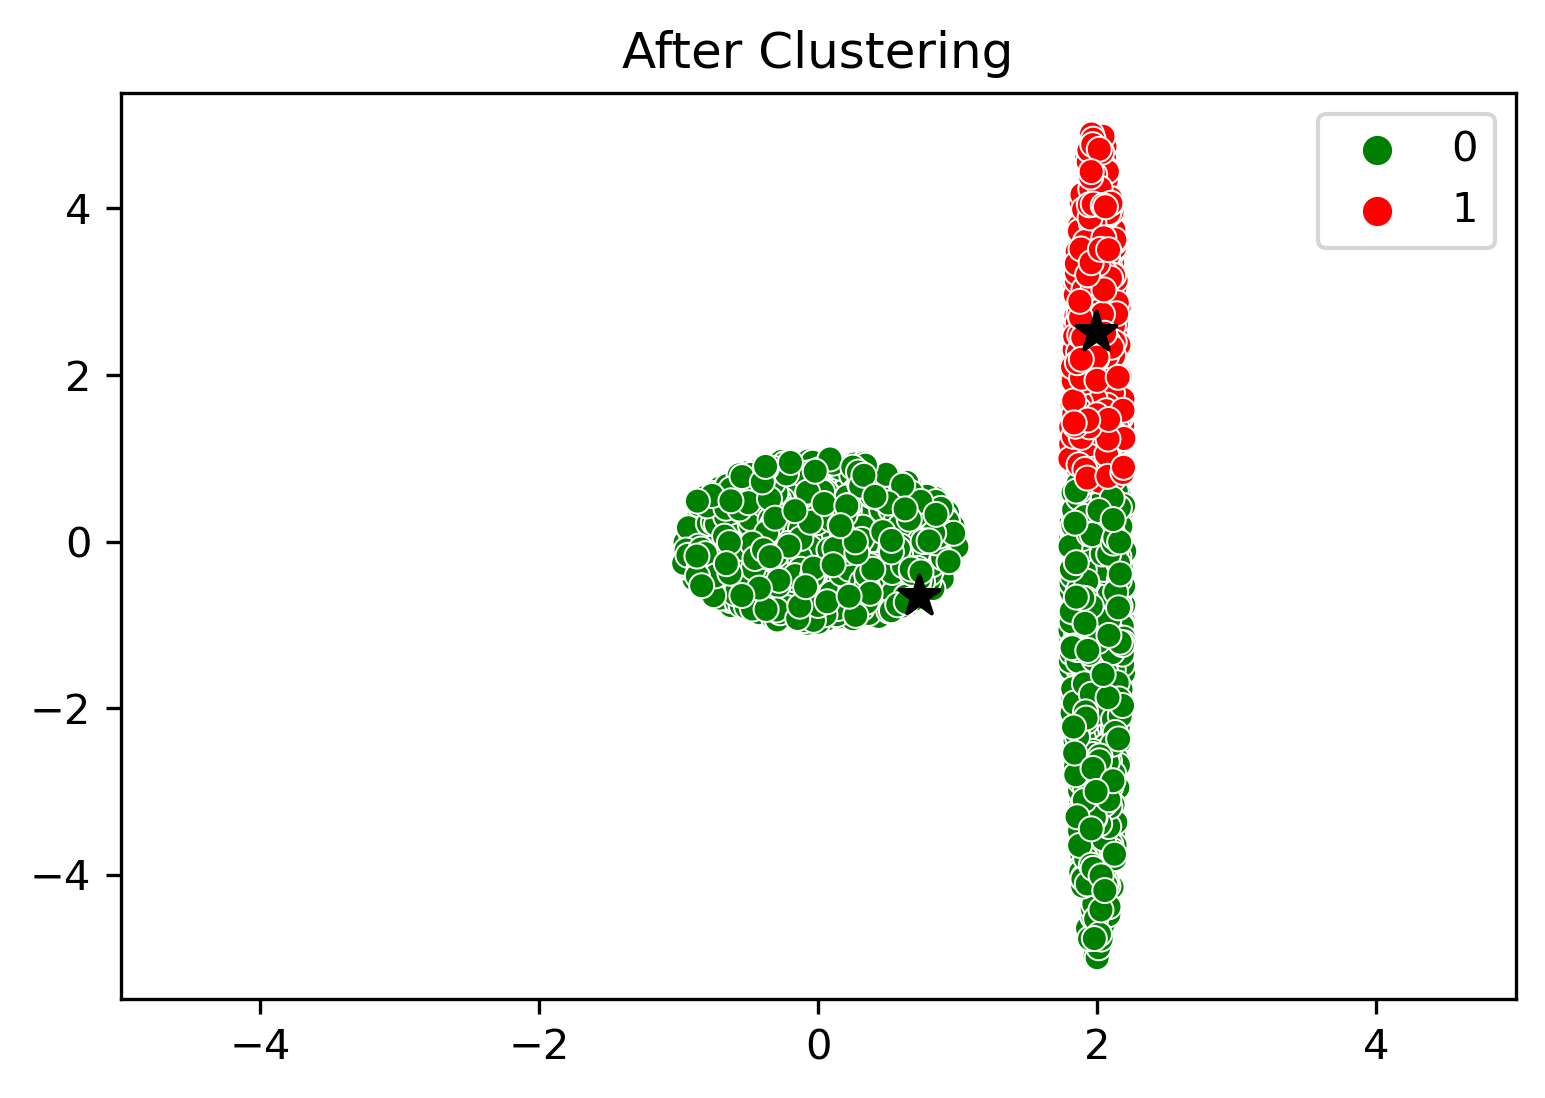

In [32]:
plt.figure(dpi=300)
plt.title('After Clustering')
plt.xlim(-5,5)
sns.scatterplot(x=diff_shape[:,0],y=diff_shape[:,1],hue=label5,palette=['Green','Red'])
plt.scatter(x=centroid5[:,0],y=centroid5[:,1],marker='*', color='Black', s=100);

<b>Those <font color='blue'>two stars</font> are the <font color='blue'>centroids</font> of their respective <font color='blue'>clusters</font>. In the above case, what would have been otherwise interpreted as one circular cluster and one elliptical cluster by a human, is now clustered in the above manner by the algorithm.

Note: In all the above scenarios, if the clusters were far enough, then the KMeans algorithmic clustering and our intuitive clustering would match.<br><br>

Hope you found this notebook useful. Lets connect!<br>
https://www.linkedin.com/in/fazil-mohammed-4062711b2/<br>
https://github.com/Fazil-Math